In [ ]:
import pandas as pd
import numpy as np

In [2]:
housing_data = pd.read_csv("./dataset/housing.csv")

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#housing_data.info()

In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

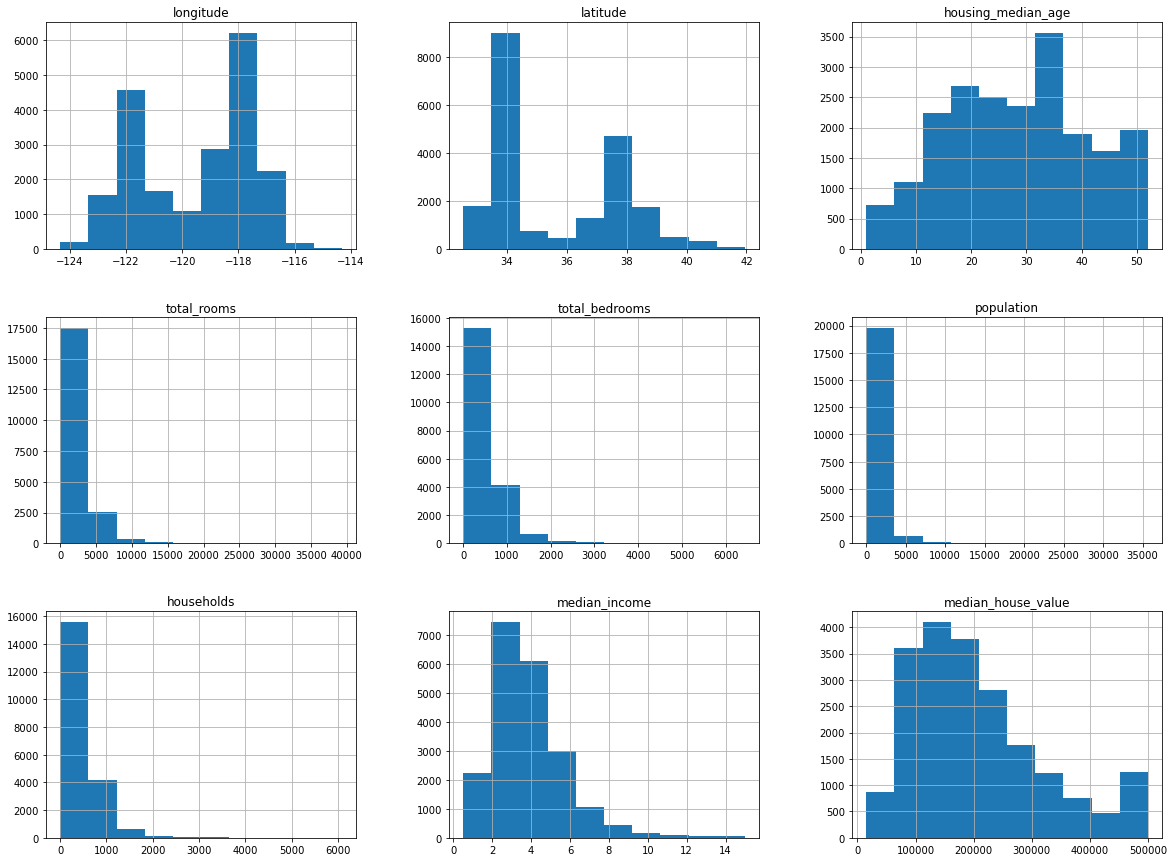

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

housing_data.hist(bins=10, figsize=(20,15))
plt.show()

In [33]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'], bins=[0,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, random_state=43, test_size=0.2)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    train_set, test_set = housing_data.iloc[train_index], housing_data.iloc[test_index]

In [35]:
train_set['income_cat'].value_counts()/len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

Removing the "income_cat" column from both test and train set

In [36]:
for set_ in (train_set, test_set):
    set_.drop('income_cat', axis=1, inplace=True)

C:\Users\sidka\AppData\Local\Temp\ipykernel_28188\2354307679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)
C:\Users\sidka\AppData\Local\Temp\ipykernel_28188\2354307679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

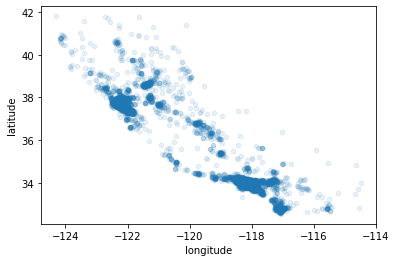

In [40]:
housing_dummy = test_set.copy()
housing_dummy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

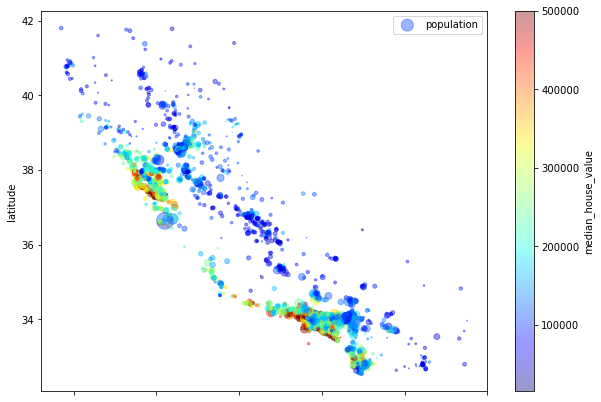

In [49]:
housing_dummy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                  s=housing_dummy['population']/100, label='population', figsize=(10,7),
                  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)